# 09 - Safety Assessment - Practice

In this practice, we will be given a scenario (environment and object data) paired with a set of possible trajectories for the ego-vehicle. The goal is to implement a (simple) online safety assessment selecting the safetst trajectory among the given ones.

![figures/overview.png](figures/overview.png)

First, import of required packages (and definitions):

In [1]:
import numpy as np
try:
    import scenario_testing_tools as stt
except ImportError as IE:
    print("please install costum module via 'pip install scenario-testing-tools'")
    print("please install costum module via 'pip install trajectory-planning-helpers'")
import matplotlib.pyplot as plt

# define TUM colors
TUM_colors = {
    "TUM_blue": "#3070b3",
    "TUM_orange": "#E37222",
    "TUM_green": "#A2AD00",
    "TUM_blue_dark": "#003359",
    "TUM_grey_dark": "#9a9a9a",
    "TUM_blue_medium": "#64A0C8",
    "TUM_blue_light": "#98C6EA",
}

### Load and initialize scenario data

Now we will retrieve and generate the required scenario data. 

The scenarios are stored in scenario-files, that can be easily accessed with the "scenario_testing_tools"-package. Each of the scenarios holds identical track bounds and the same object vehicle behavior. Solely the ego-trajectory is different in the five scenarios.

First, we set the relative path to the scenario files.

In [2]:
# Scenario files
file_scn1 = "scenarios/scenario_1.saa"
file_scn2 = "scenarios/scenario_2.saa"
file_scn3 = "scenarios/scenario_3.saa"
file_scn4 = "scenarios/scenario_4.saa"
file_scn5 = "scenarios/scenario_5.saa"

Second, we extract the track boundaries from the a scenario file. Since all scenario files are same, any file can be chosen.

In [3]:
# -- get track boundaries from scenario file --
bound_l, bound_r = stt.get_scene_track.get_scene_track(file_path=file_scn1)

Third, we import the poses of the object vehicle. As with the track boundaries, any file can be chosen.
Since the object vehicle poses are stored for distinct time stamps in the scenario, we iterate over all available time-stamps and extract the corresponding pose.

In [4]:
# -- trajectory of object vehicle --

# init list containers (length not known beforehand)
t_obj = []
x_obj = []
y_obj = []
psi_obj = []
v_obj = []

# get all entries from scenario file
i = 0
while True:
    try:
        # get object list entry, if requested time stamp is not in file an error is raised
        data = stt.get_scene_timesample.get_scene_timesample(
            file_path=file_scn1, t_in=i
        )
        time = data[0]
        obj_list = data[8]
        
        # get first (and only) object in the object list
        obj = next(iter(obj_list.values()))

        # append data to list containers
        t_obj.append(time)
        x_obj.append(obj["X"])
        y_obj.append(obj["Y"])
        psi_obj.append(obj["psi"])
        v_obj.append(obj["vel"])

        # increase counter
        i += 1
    except:
        break

# get numpy array form list containers, columns [t, x, y, psi, v]
traj_obj = np.column_stack((t_obj, x_obj, y_obj, psi_obj, v_obj))

Finally, we load all trajectory candidates for the ego-vehicle. Here, the "scenario_testing_tools"-package provides a function to load the complete trajectory with one call (no iteration required).

In [5]:
# -- trajectories of ego-vehicle --

# get first ego trajectory data
data = stt.get_scene_ego_traj.get_scene_ego_traj(file_path=file_scn1, append_plan=False)

# get numpy array for first ego trajectory with columns [t, x, y, psi, curv, v, a]
traj_ego1 = np.column_stack((data[:7]))

# execute this for the remaining four trajectories (in line)
traj_ego2 = np.column_stack(
    (
        stt.get_scene_ego_traj.get_scene_ego_traj(
            file_path=file_scn2, append_plan=False
        )[:7]
    )
)
traj_ego3 = np.column_stack(
    (
        stt.get_scene_ego_traj.get_scene_ego_traj(
            file_path=file_scn3, append_plan=False
        )[:7]
    )
)
traj_ego4 = np.column_stack(
    (
        stt.get_scene_ego_traj.get_scene_ego_traj(
            file_path=file_scn4, append_plan=False
        )[:7]
    )
)
traj_ego5 = np.column_stack(
    (
        stt.get_scene_ego_traj.get_scene_ego_traj(
            file_path=file_scn5, append_plan=False
        )[:7]
    )
)

Now we can visualize the imported data (in this case for `traj_ego1`).

Text(0, 0.5, '$y$ in m')

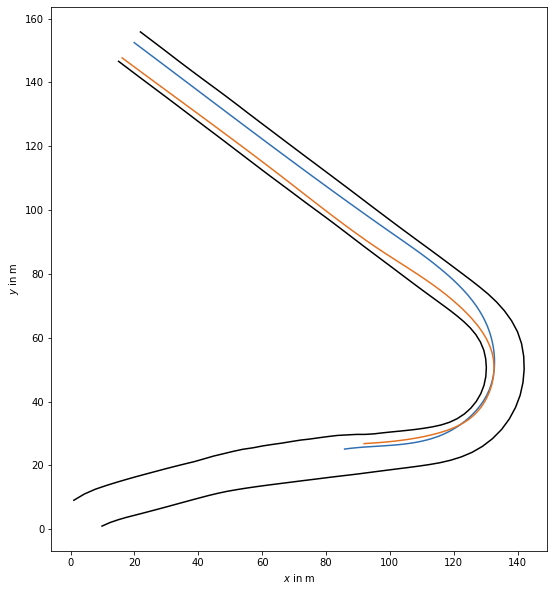

In [6]:
fig = plt.figure()
fig.set_size_inches(10, 10)

# plot boundaries
plt.plot(bound_l[:, 0], bound_l[:, 1], "k")
plt.plot(bound_r[:, 0], bound_r[:, 1], "k")

# plot object trajectory (in blue)
plt.plot(traj_obj[:, 1], traj_obj[:, 2], TUM_colors["TUM_blue"])

# plot ego trajectory 1 (in orange)
plt.plot(traj_ego1[:, 1], traj_ego1[:, 2], TUM_colors["TUM_orange"])

# plot metadata
plt.gca().set_aspect("equal", "box")
plt.gca().set_xlabel("$x$ in m")
plt.gca().set_ylabel("$y$ in m")

Since this display neglects the temporal information, we can setup a simple animation.

In [12]:
from matplotlib.animation import FuncAnimation

fig,ax = plt.subplots()
fig.set_size_inches(10, 10)

# plot boundaries
ax.plot(bound_l[:, 0], bound_l[:, 1], "k")
ax.plot(bound_r[:, 0], bound_r[:, 1], "k")

# plot metadata
ax.set_aspect("equal", "box")
ax.set_xlabel("$x$ in m")
ax.set_ylabel("$y$ in m")

# plot dummys for vehicles
(veh_obj,) = ax.plot(0.0, 0.0, TUM_colors["TUM_blue"], marker=".", markersize=12)
(veh_ego,) = ax.plot(0.0, 0.0, TUM_colors["TUM_orange"], marker=".", markersize=12)

# select an ego-trajectory to be displayed
traj_ego_sel = traj_ego2


def update(i):
    # set current time-stamp as title
    ax.set_title("t = %.2fs" % traj_ego_sel[i, 0])
   
    # update vehicle positions
    veh_obj.set_data(traj_obj[i, 1], traj_obj[i, 2])
    veh_ego.set_data(traj_ego_sel[i, 1], traj_ego_sel[i, 2])
    return


# FuncAnimation will call the 'update' function for each frame
# animating all frames, with an interval of q00ms between frames
anim = FuncAnimation(
    fig,
    update,
    frames=np.arange(0, min(traj_ego_sel.shape[0], traj_obj.shape[0])),
    interval=100,
)

# plt.show() will just loop the animation forever in a normal shell
# for jupyter we need a html wrapper
from IPython.display import HTML
# close the empty figure
plt.close()
HTML(anim.to_jshtml())


### TTC Rating

In a first step we want to rate our trajectory candidates against the object vehicle. Therefore, we will focus on a specific point in time (t = 4s) of our ego-trajectory as well as on the object vehicle.

*Note: In this case we have perfect information about the future of the object vehicle, on a real vehicle one would have to predict the behavior of the other vehicle or rely on a rating of the current time step only.*

To make the evaluation for all trajectories simple, we define a function that determines the TTC for a specific constellation.

Reminder TTC:
$$\mathrm{TTC} = \frac{d_\mathrm{x}}{(v_\mathrm{ego} - v_\mathrm{le})}$$,
for a given longitudinal distance $d_\mathrm{x}$, ego velocity $v_\mathrm{ego}$ and velocity of the lead vehicle $v_\mathrm{le}$.

In [10]:
def calc_ttc(
    pos_ego: np.ndarray,
    vel_ego: float,
    pos_obj: np.ndarray,
    vel_obj: float,
    veh_len: float = 4.7,
):
    """
    Calculates the time to collision (TTC) for a given ego vehicle (pos, vel) and an object vehicle (pos, vel).
    Assumption: the provided object vehicle is _in front_ of the ego vehicle.
    
    :param pos_ego:    position of ego vehicle as numpy array with columns x, y [in m]
    :param vel_ego:    velocity of ego vehicle [in m/s]
    :param pos_obj:    position of object vehicle as numpy array with columns x, y [in m]
    :param vel_obj:    velocity of object vehicle [in m/s]
    :param veh_len:    (optional) vehicle length (assumed identical for both) [in m]
    :returns ttc:      time to collision [in s]
    """

    # check if ego vehicle is faster than leading vehicle (otherwise it will never reach the other vehicle)
    if vel_ego > vel_obj:
        # calculate distance between vehicles (bumper to bumper)
        dist = np.hypot(pos_ego[0] - pos_obj[0], pos_ego[1] - pos_obj[1]) - veh_len

        # calculate ttc
        ttc = dist / (vel_ego - vel_obj)

    else:
        ttc = np.inf

    return ttc

Now we can use this function to calculate the TTC at t = 4s for all trajectory candidates.

In [13]:
# find index in trajectory that is closest to t = 4s
t = 4.0
idx_t = np.argmin(np.abs(traj_ego1[:, 0] - t))

# calculate TTC for all ego trajectory candidates
ttc = []
for traj_ego in [traj_ego1, traj_ego2, traj_ego3, traj_ego4, traj_ego5]:
    ttc.append(
        calc_ttc(
            pos_ego=traj_ego[idx_t, 1:3],
            vel_ego=traj_ego[idx_t, 5],
            pos_obj=traj_obj[idx_t, 1:3],
            vel_obj=traj_obj[idx_t, 4],
        )
    )

print(ttc)

[1.1189908403695252, 51.48383170366264, 22.590351582254538, 5.9930179837102004, 3.0924920546648202]


The smaller the TTC, the more critical the situation. Once the TTC reaches a value of $0$, a collision happens. In related work, a value of $2.0$ and below is considered as critical. Therefore, one of the given trajectories is considered critical w.r.t. the TTC rating.

### Acceleration Limit Rating

Next we will check the total requested acceleration resulting on the tire for each of the trajectories. Therefore, we assume a simple fricion model (friction circle) holds, such that the total acceleration - composed of a lateral and longitudinal acceleration - must not exceed a track and tire specific value.

![figures/friction_circle.png](figures/friction_circle.png)

It should be noted, that the drag acting on the vehicle can be calculated as follows:
$$a_\mathrm{drag} = v^2 c_\mathrm{drag} / m,$$
where $v$ is the velocity, $m$ the mass, and $c_\mathrm{drag}$ the vehicle specific drag coefficient (including mass density and reference area). For the vehicle specific drag coefficient a value of $0.954$ can be assumed. For the vehcile mass, a value of $1160.0$ can be assumed.

Similar to the TTC rating, we start of by defining a function that handles the calculation of the combined accelration.

In [14]:
def calc_a_comb(traj_ego: np.ndarray, c_drag: float = 0.954, m_veh: float = 1160.0):
    """
    Calculates the combined acceleration acting on the tires for a given trajectory.
    
    :param traj_ego:   ego trajectory with columns [t, x, y, psi, curv, v, a]
    :param c_drag:     (optional) vehicle specific drag coefficient
    :param m_veh:      (optional) vehicle mass
    :returns a_comb:   combined acceleration acting on the tires along the trajectory  
    """

    # for each point on the planed trajectory, extract curvature, velocity and longitudinal acceleration
    ego_curve = traj_ego[:, 4]
    ego_velocity = traj_ego[:, 5]
    a_lon_used = traj_ego[:, 6]

    # for each point on the planned trajectory, calculate the lateral acceleration based on curvature and velocity
    a_lat_used = np.power(ego_velocity[:], 2) * ego_curve[:]

    # calculate equivalent longitudinal acceleration of drag force along velocity profile
    a_lon_drag = np.power(ego_velocity[:], 2) * c_drag / m_veh

    # drag reduces requested deceleration but increases requested acceleration at the tire
    a_lon_used += a_lon_drag

    # calculate used combined acceleration
    a_comb = np.sqrt(np.power(np.abs(a_lon_used), 2) + np.power(np.abs(a_lat_used), 2))

    return a_comb

Now we can use this function to calculate the combined acceleration along all trajectory candidates.

In [15]:
# calculate combined acceleration for all ego trajectory candidates
a_comb = []
for traj_ego in [traj_ego1, traj_ego2, traj_ego3, traj_ego4, traj_ego5]:
    a_comb.append(calc_a_comb(traj_ego=traj_ego))
# print maximum combined acceleration for each of the trajectory candidates
print([max(a) for a in a_comb])

[7.551940680291317, 7.312706120372669, 26.9149081925108, 12.289000273377246, 14.910929658220725]


The acceleration limit for the tire-track-combination was determined to reside at $15.0 m/s^2$. Therefore, one of the trajectories significantly exceeds this limit an must be flagged as unsafe.

If we want to see more details here we can plot the acceleration and velocity over time.

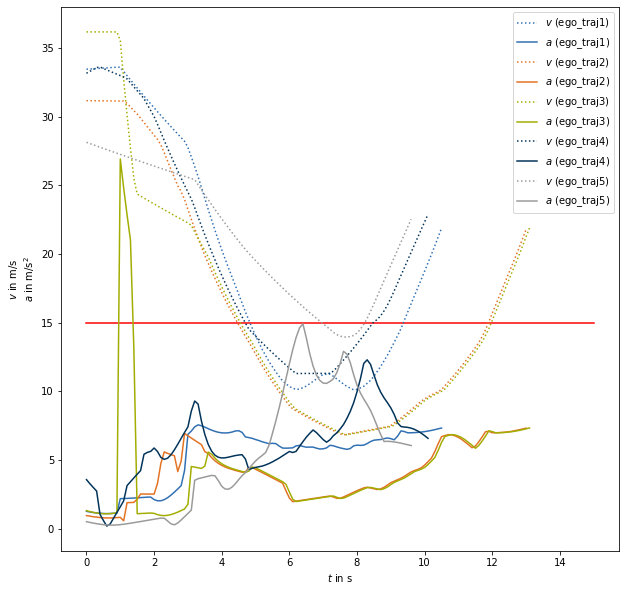

In [16]:
fig = plt.figure()
fig.set_size_inches(10, 10)

# plot metadata
plt.gca().set_xlabel("$t$ in s")
plt.gca().set_ylabel("$v$ in m/s\n$a$ in m/s$^2$")

# plot 15m/s^2 bound
plt.plot([0.0, 15.0], [15.0, 15.0], "r")

for i, (traj_ego_sel, a_comb_sel) in enumerate(
    zip([traj_ego1, traj_ego2, traj_ego3, traj_ego4, traj_ego5], a_comb)
):
    # plot velocity
    plt.plot(
        traj_ego_sel[:, 0],
        traj_ego_sel[:, 5],
        list(TUM_colors.values())[i],
        linestyle=":",
        label="$v$ (ego_traj" + str(i + 1) + ")",
    )

    # plot combined acceleration
    plt.plot(
        traj_ego_sel[:, 0],
        a_comb_sel,
        list(TUM_colors.values())[i],
        label="$a$ (ego_traj" + str(i + 1) + ")",
    )

plt.gca().legend()

### Rating and Outlook

Based on the generated scores we can label each of the trajectories with a boolean flag. Unsafe trajectories will receive a `False` flag.

NOTE: For now, we rated two properties only, i.e. a trajectory not violating one of the ratings above still can be unsafe w.r.t. some other metric.

In [17]:
s_traj = []

for ttc_i, a_comb_i in zip(ttc, a_comb):
    s_traj.append((ttc_i > 2.0 and max(a_comb_i) <= 15.0))

print(s_traj)

[False, True, False, True, True]


Based on the TTC rating and the acceleration limit rating, we can sort out two of the five provided trajectories. The homework will cover an alternative to the TTC rating and focus on the track limit adherance. The goal is to ultimatively state, which of the five trajectories is the most promising one.

In [ ]:
ö